<a href="https://colab.research.google.com/github/ohhanol/MachineLearning/blob/main/wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 과제

>  **data 폴더의 wine.csv를 read 하여 데이터 분석 및 Perceptron을 이용한 결정 경계 그래프 그리기**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 작업할 폴더 위치 설정 (본인 폴더 경로에 맞게 수정필요)
colab_path = "/content/drive/MyDrive/MachineLearning/6주차"

In [ ]:
# data 폴더의 wine.csv read
import os
import pandas as pd

df=pd.read_csv(os.path.join(colab_path, 'wine.csv') )
df.tail()

,1,14.22,3.99,2.51,13.2,128,3,3.04,0.2,2.08,5.1,0.89,3.53,760
116,2,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
117,2,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
118,2,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710
119,2,12.72,1.81,2.20,18.8,86,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714
120,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718


In [ ]:
# 붓꽃 예제의 np.where 함수 용법을 참고하여, wine.csv의 정답 클래스 전처리
# Hint: wine의 정답 class는 0번 열에 위치

import matplotlib.pyplot as plt
import numpy as np

# 모든 wine에 대해 0번 열, 즉 정답 클래스를 선택해 y에 담기
y=df.iloc[:,0].values
y_before=y

# 전처리 전 정답 클래스 출력
print(y_before)

# numpy where 함수를 사용해 정답 클래스가 1번 wine이면 → -1 반환 / 2번 wine이면 1 반환
y=np.where(y==1, -1, 1)

# 전처리 후 정답 클래스 출력
print('\n', y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2]

 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1]


In [ ]:
# X 값으로 사용할 변수에 dataframe의 alchol(1번 열) proline(10번 열)의 값을
# 담아 특징으로 사용
X=df.iloc[:, [1, 10]].values

In [ ]:
# 1. MinMaxScaler 함수로 정규화 수행
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
scaler1.fit(X)
X_norm=scaler1.transform(X)

# 정규화 결과 앞에 10개만 출력
X_norm[0:10,:]


array([[0.5       , 0.42257218],
       [0.79736842, 0.57349081],
       [0.66578947, 0.63648294],
       [0.53157895, 0.30183727],
       [0.68684211, 0.50131234],
       [0.65      , 0.29396325],
       [0.59210526, 0.43569554],
       [0.53157895, 0.49343832],
       [0.74736842, 0.42257218],
       [0.64473684, 0.50131234]])

In [ ]:
# X값에 대해 MinMaxScaler or StandardScaler 함수로 정규화 수행
from sklearn.preprocessing import StandardScaler

# 2. StandardScaler 함수로 정규화 수행

scaler2=StandardScaler()
X_std=scaler2.fit_transform(X)

X_std[0:10,:]

array([[-0.01947465,  0.15820168],
       [ 1.23654839,  0.85176704],
       [ 0.68078598,  1.14125519],
       [ 0.11390833, -0.3966506 ],
       [ 0.76970797,  0.52006187],
       [ 0.61409449, -0.43283662],
       [ 0.36955904,  0.21851172],
       [ 0.11390833,  0.48387585],
       [ 1.02535868,  0.15820168],
       [ 0.591864  ,  0.52006187]])

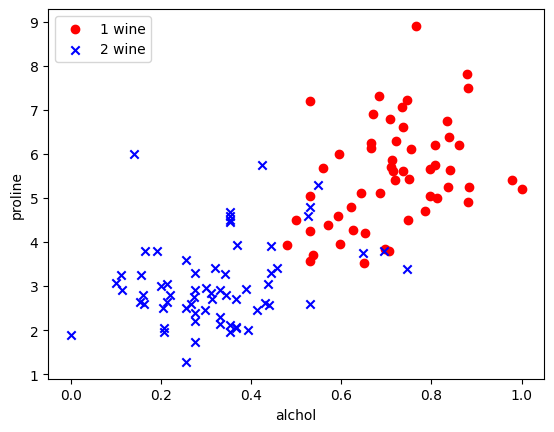

In [ ]:
# 산점도 그리기 - class 1 -> (x_wine 0 ~ 55), class2 -> (x_wine 56 ~ 121)

plt.scatter(X_norm[:55,0],X[:55,1],
            color='r', marker='o', label='1 wine')
plt.scatter(X_norm[56:121,0],X[56:121,1],
            color='b', marker='x', label='2 wine')

plt.xlabel('alchol')  # x축
plt.ylabel('proline')  # y축
plt.legend(loc='upper left')  # 범례 위치 설정

plt.show()

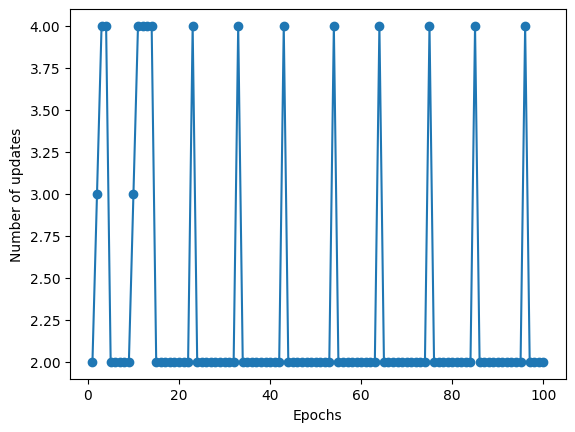

In [ ]:
# Perceptron 설정 및 학습 (eta, n_itrer 조정 추천)
class Perceptron(object):
    """퍼셉트론 분류기 구현 """
    def __init__(self, eta=0.01, n_iter=0, random_state=1):
        ''' 초기화 함수 구현 '''
        self.eta=eta  # 학습률(learning rate)
        self.n_iter=n_iter    # epoch 횟수 = 데이터 반복 횟수
        self.random_state=random_state  # 랜덤 초기화를 위한 시드값

    def fit(self, X, y):
        """훈련 데이터 학습 함수 구현"""
        # 난수 생성
        rgen=np.random.RandomState(self.random_state)
        # 초기해 w 설정
        self.w_=rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_=[]   # epoch 마다 쌓이는 오분류를 저장할 리스트

        for _ in range(self.n_iter):    # 주어진 epoch 횟수 동안 반복
          errors=0
          for xi,target in zip(X,y):
            update=self.eta*(target-self.predict(xi))
            self.w_[1:] += update*xi
            self.w_[0]+=update
            errors+=int(update !=0.0)   # 오분류를 누적
          self.errors_.append(errors)
        return self
    def net_input(self, X):
        """입력 계산 함수 구현"""
        return np.dot(X,self.w_[1:])+self.w_[0]
    def predict(self, X):
        """예측 함수 구현"""

        # 무작위로 작은 수로 가중치 초기화
            # 가중치 업데이트
        # 가중치와 입력 X의 선형 조합
      # 결과가 0보다 크거나 같으면 1, 아니면 -1
        return np.where(self.net_input(X)>=0.0, 1, -1)

ppn=Perceptron(eta=0.01, n_iter=100)

ppn.fit(X_norm, y)

# Epochs당 Number of updates 그래프 출력
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

<ipython-input-10-18556c79a7ab>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


<function matplotlib.pyplot.show(close=None, block=None)>

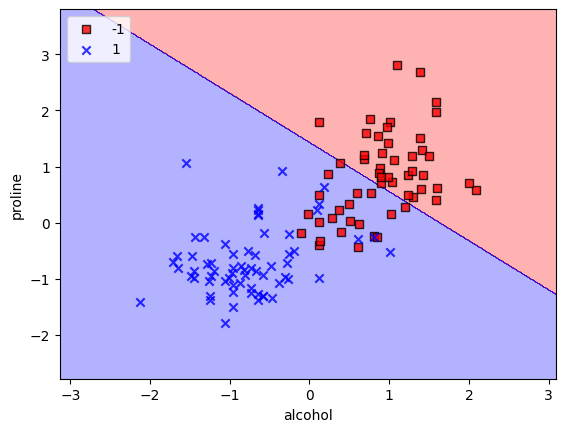

In [ ]:
# 결정 경계 그래프 출력
from matplotlib.colors import ListedColormap

# 결정 경계 그래프 함수 정의
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

# plot_decision_regions 함수를 사용하여 결정 경계 그래프 출력
plot_decision_regions(X_std, y, classifier=ppn)
plt.xlabel('alcohol')
plt.ylabel('proline')
plt.legend(loc='upper left')


plt.show


# **추가 실습 과제**
- 다른 특징을 사용해 결정평면 그리기
- MLxtend 라이브러리를 이용해 데이터셋의 개요를 살펴보고 좋은 특징값 고르기

1. 라벨값과 1열 ∼ 6열 특징 값을 각각 y와 X에 담는다

In [ ]:
# 필요한 library import
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

names=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols']

# 라벨값을 y1에, 1∼6열 특징값을 X에 저장
y1=df.iloc[:,0].values
X=df.iloc[:,1:7].values




2. 1∼6열까지의 특징값을 이용해 데이터셋의 산점도 행렬을 출력해본 뒤 어떤 특징값이 분류에 적합한 지 살펴본다

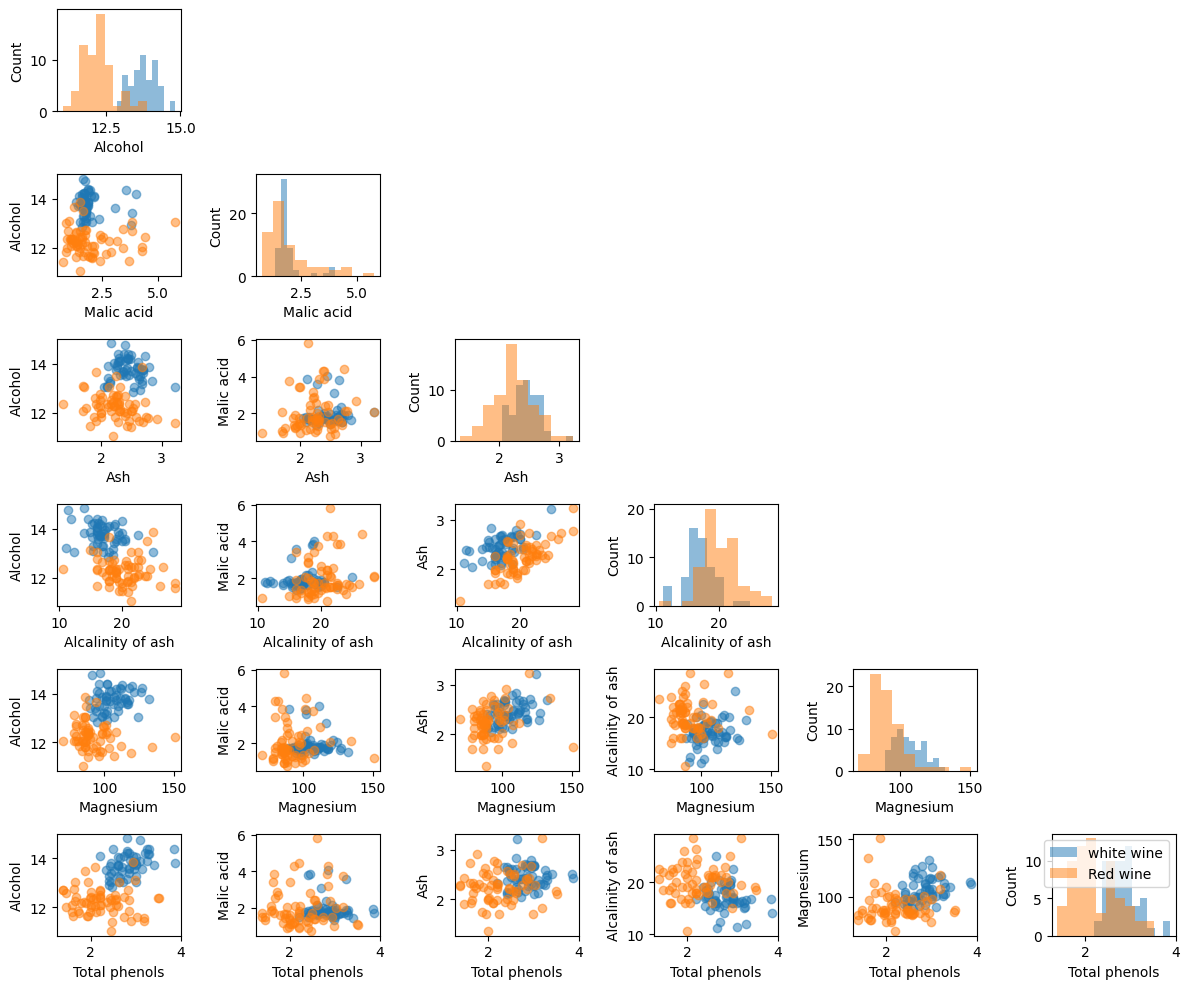

In [ ]:
# 1번 와인 = white wine / 2번 와인 = red wine
fig, axes=scatterplotmatrix(X[y1==1], figsize=(12,10), alpha=0.5)         # y==1번 와인일 때 출력
fig, axes=scatterplotmatrix(X[y1==2], fig_axes=(fig,axes), alpha=0.5, names=names)  # y==2번 와인일 때 출력

plt.tight_layout()
plt.legend(labels=['white wine', 'Red wine']) # 범례 추가
plt.show()

3. 위 결과를 통해 1열, 4열의 특징 값을 선택했다고 가정. 고른 특징값으로 결정평면 그리는 작업 수행

In [ ]:
# numpy where 함수를 사용해 정답 클래스가 1번 wine이면 → -1 반환 / 2번 wine이면 1 반환
y1=np.where(y1==1, -1, 1)

# 전처리 후 정답 클래스 출력
print('\n', y1)


 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1]


In [ ]:
# 고른 특징값 (1열, 4열)을 X1에 담기
X1=df.iloc[:, [1, 4]].values

In [ ]:
# MinMaxScaler 함수로 정규화 수행
scaler3=MinMaxScaler()
scaler3.fit(X1)
X1_norm=scaler1.transform(X1)

# 정규화 결과 앞에 10개만 출력
X1_norm[0:10,:]


array([[0.5       , 2.27296588],
       [0.79736842, 1.93175853],
       [0.66578947, 1.95800525],
       [0.53157895, 3.11286089],
       [0.68684211, 1.82677165],
       [0.65      , 2.45669291],
       [0.59210526, 1.86614173],
       [0.53157895, 2.06299213],
       [0.74736842, 2.37795276],
       [0.64473684, 2.52230971]])

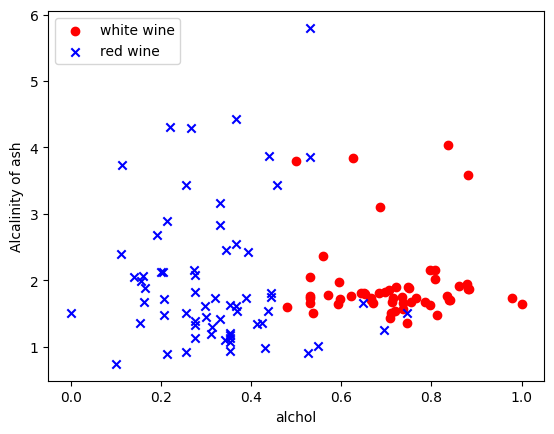

In [ ]:
# 산점도 그리기 - class 1 -> (x_wine 0 ~ 55), class2 -> (x_wine 56 ~ 121)

plt.scatter(X1_norm[:55,0],X[:55,1],
            color='r', marker='o', label='white wine')
plt.scatter(X1_norm[56:121,0],X[56:121,1],
            color='b', marker='x', label='red wine')

plt.xlabel('alchol')  # x축
plt.ylabel('Alcalinity of ash')  # y축
plt.legend(loc='upper left')  # 범례 위치 설정

plt.show()

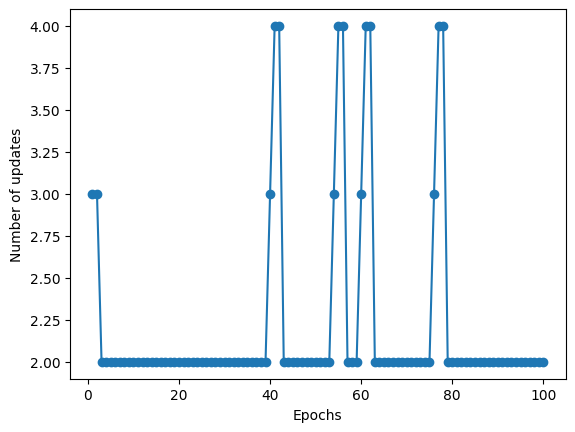

In [ ]:
# Perceptron 학습
ppn=Perceptron(eta=0.01, n_iter=100)

ppn.fit(X1_norm, y1)

# Epochs당 Number of updates 그래프 출력
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

<ipython-input-10-18556c79a7ab>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


<function matplotlib.pyplot.show(close=None, block=None)>

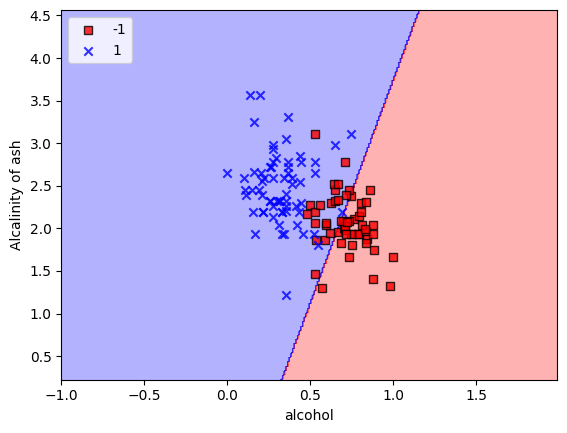

In [ ]:
# plot_decision_regions 함수를 사용하여 결정 경계 그래프 출력
plot_decision_regions(X1_norm, y1, classifier=ppn)
plt.xlabel('alcohol')
plt.ylabel('Alcalinity of ash')
plt.legend(loc='upper left')


plt.show




*   본 과제에서는 1열과 13번째 열의 특징값들로 white/red wine 을 분류하는 실습을 수행했다


*   추가 과제로는 1열∼6열까지의 데이터셋을 산점도 행렬로 출력해본 뒤 적절한 특징값 열벡터를 골라 분류를 수행하였다

*   추가 과제를 하며 아쉬웠던 점은 적절한 특징값을 골랐다고 생각했는데 생각만큼 결정 경계가 예쁘게 나오지 않았던 것이다

*   특징값을 고르는 과정에서 문제가 있었던 건지, 선형 분류이기에 어쩔 수 없이 한계가 있는건지, 혹은 데이터 전처리 과정이 미흡했던 것인지 더 공부를 해봐야겠다는 생각이 들었다


